In [3]:
#import libraries
import numpy as np
import matplotlib as plt
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import figure
import pickle

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder


In [7]:
#Read Data
data = pd.read_csv('data.csv')
data

,state_name,region_name,percent_qualified,yearly_sunlight_kwh_f,yearly_sunlight_kwh_e,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_w,yearly_sunlight_kwh_total,number_of_panels_e,number_of_panels_f,number_of_panels_n,number_of_panels_s,number_of_panels_w,number_of_panels_total,lat_avg,lng_avg,kw_total
0,California,6037104401,86.303387,2.539152e+06,1.014756e+06,1.075291e+06,1.760043e+06,1.533140e+06,30.17,2964,6574,3159,4352,3827,20876.0,34.267040,-118.432716,5219.00
1,New York,36055009400,85.813953,2.815855e+07,7.338827e+05,1.739810e+05,1.342966e+06,7.666855e+05,18.25,2760,102635,693,4578,2899,113565.0,43.156368,-77.607040,28391.25
2,Illinois,17201000700,56.446991,2.850205e+06,1.024630e+06,1.342642e+05,3.155397e+06,1.173068e+06,22.04,3841,9963,535,10649,4421,29409.0,42.277794,-89.066589,7352.25
3,Pennsylvania,42003180300,38.297872,1.432569e+06,1.203715e+06,7.318190e+04,7.604248e+05,4.425539e+05,26.32,4920,5001,299,2529,1644,14393.0,40.422962,-79.993729,3598.25
4,California,6059086602,90.382514,1.183461e+07,2.070519e+06,1.691435e+06,3.551939e+06,3.269615e+06,39.52,5933,31555,5146,8933,8827,60394.0,33.844044,-117.933113,15098.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48717,Texas,48121020113,84.426947,4.693639e+05,4.147494e+06,4.619307e+05,1.036969e+07,6.523585e+06,10.42,13393,1375,1587,28278,19889,64522.0,33.176277,-96.911400,16130.50
48718,New Jersey,34027042302,45.887850,1.764473e+07,1.208407e+06,4.270519e+04,1.835456e+06,7.341181e+05,28.38,4499,60447,168,6455,2804,74373.0,40.838047,-74.476219,18593.25
48719,California,6037543322,96.548550,1.538690e+07,3.611829e+06,1.928394e+06,6.935740e+06,4.787012e+06,14.21,10146,40522,5723,17096,12666,86153.0,33.852547,-118.256958,21538.25
48720,South Carolina,45079010309,83.550045,3.117499e+06,7.984434e+06,1.216144e+06,1.185587e+07,9.036818e+06,39.63,26425,9416,4200,35235,28782,104058.0,34.113491,-81.140663,26014.50


In [8]:
#Shape of dataset
data.shape

(48722, 18)

In [9]:
#remove unwanted data
data=data.drop(labels=['yearly_sunlight_kwh_e', 'yearly_sunlight_kwh_n','yearly_sunlight_kwh_s','yearly_sunlight_kwh_w','number_of_panels_e','number_of_panels_s','number_of_panels_w','yearly_sunlight_kwh_f','number_of_panels_f','number_of_panels_n'], axis=1)
data

,state_name,region_name,percent_qualified,yearly_sunlight_kwh_total,number_of_panels_total,lat_avg,lng_avg,kw_total
0,California,6037104401,86.303387,30.17,20876.0,34.267040,-118.432716,5219.00
1,New York,36055009400,85.813953,18.25,113565.0,43.156368,-77.607040,28391.25
2,Illinois,17201000700,56.446991,22.04,29409.0,42.277794,-89.066589,7352.25
3,Pennsylvania,42003180300,38.297872,26.32,14393.0,40.422962,-79.993729,3598.25
4,California,6059086602,90.382514,39.52,60394.0,33.844044,-117.933113,15098.50
...,...,...,...,...,...,...,...,...
48717,Texas,48121020113,84.426947,10.42,64522.0,33.176277,-96.911400,16130.50
48718,New Jersey,34027042302,45.887850,28.38,74373.0,40.838047,-74.476219,18593.25
48719,California,6037543322,96.548550,14.21,86153.0,33.852547,-118.256958,21538.25
48720,South Carolina,45079010309,83.550045,39.63,104058.0,34.113491,-81.140663,26014.50


In [10]:
#Type of datatypes
data.dtypes

state_name                    object
region_name                    int64
percent_qualified            float64
yearly_sunlight_kwh_total    float64
number_of_panels_total       float64
lat_avg                      float64
lng_avg                      float64
kw_total                     float64
dtype: object

In [11]:
#Check Null Values
data.isnull().sum()

state_name                    1
region_name                   0
percent_qualified             0
yearly_sunlight_kwh_total     0
number_of_panels_total       58
lat_avg                       0
lng_avg                       0
kw_total                     58
dtype: int64

In [12]:
# Summary of the data set
data.describe().T

,count,mean,std,min,25%,50%,75%,max
region_name,48722.0,2.667656e+10,1.619133e+10,1.001020e+09,1.203102e+10,2.616350e+10,4.010911e+10,5.603997e+10
percent_qualified,48722.0,7.741123e+01,1.571284e+01,0.000000e+00,6.795829e+01,7.980376e+01,8.985507e+01,1.000000e+02
yearly_sunlight_kwh_total,48722.0,2.502032e+01,8.685903e+00,1.000000e+01,1.749000e+01,2.499000e+01,3.259000e+01,4.000000e+01
number_of_panels_total,48664.0,6.848364e+04,6.652033e+04,8.000000e+00,2.714950e+04,5.292250e+04,8.916275e+04,1.545850e+06
lat_avg,48722.0,3.745727e+01,5.070044e+00,1.956049e+01,3.383872e+01,3.844280e+01,4.118943e+01,6.498893e+01
lng_avg,48722.0,-9.301239e+01,1.712806e+01,-1.581242e+02,-1.063471e+02,-8.768416e+01,-8.018100e+01,-6.826817e+01
kw_total,48664.0,1.712091e+04,1.663008e+04,2.000000e+00,6.787375e+03,1.323062e+04,2.229069e+04,3.864625e+05


In [13]:
#Decription of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48722 entries, 0 to 48721
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   state_name                 48721 non-null  object 
 1   region_name                48722 non-null  int64  
 2   percent_qualified          48722 non-null  float64
 3   yearly_sunlight_kwh_total  48722 non-null  float64
 4   number_of_panels_total     48664 non-null  float64
 5   lat_avg                    48722 non-null  float64
 6   lng_avg                    48722 non-null  float64
 7   kw_total                   48664 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 3.0+ MB


# Pre Process DataSet

In [14]:
#Dropped rows which contatinge null values
data=data.dropna()

In [15]:
#Check Null Values
data.isnull().sum()

state_name                   0
region_name                  0
percent_qualified            0
yearly_sunlight_kwh_total    0
number_of_panels_total       0
lat_avg                      0
lng_avg                      0
kw_total                     0
dtype: int64

In [16]:
# Summary of the preporcessed data set
data.describe().T

,count,mean,std,min,25%,50%,75%,max
region_name,48664.0,2.667997e+10,1.618663e+10,1.001020e+09,1.203102e+10,2.616351e+10,4.010911e+10,5.603997e+10
percent_qualified,48664.0,7.750349e+01,1.549313e+01,1.448226e-01,6.800000e+01,7.982665e+01,8.987342e+01,1.000000e+02
yearly_sunlight_kwh_total,48664.0,2.501973e+01,8.685149e+00,1.000000e+01,1.749000e+01,2.499000e+01,3.258250e+01,4.000000e+01
number_of_panels_total,48664.0,6.848364e+04,6.652033e+04,8.000000e+00,2.714950e+04,5.292250e+04,8.916275e+04,1.545850e+06
lat_avg,48664.0,3.745051e+01,5.052329e+00,1.956049e+01,3.383823e+01,3.844180e+01,4.118711e+01,6.498893e+01
lng_avg,48664.0,-9.299219e+01,1.709673e+01,-1.581242e+02,-1.063300e+02,-8.768378e+01,-8.017984e+01,-6.826817e+01
kw_total,48664.0,1.712091e+04,1.663008e+04,2.000000e+00,6.787375e+03,1.323062e+04,2.229069e+04,3.864625e+05


# Analyse Data Set

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


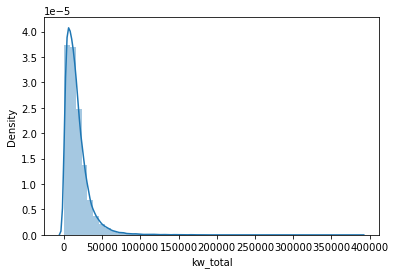

In [17]:
# Power Generation Distribution


plt.figure.Figure(figsize=(6,6))
sns.distplot(data["kw_total"], hist=True);

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48664 entries, 0 to 48721
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   state_name                 48664 non-null  object 
 1   region_name                48664 non-null  int64  
 2   percent_qualified          48664 non-null  float64
 3   yearly_sunlight_kwh_total  48664 non-null  float64
 4   number_of_panels_total     48664 non-null  float64
 5   lat_avg                    48664 non-null  float64
 6   lng_avg                    48664 non-null  float64
 7   kw_total                   48664 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 3.3+ MB


In [19]:
# Grab Column types
def grab_column_names(df):
    cat_cols = [col for col in df.columns if df[col].dtypes == "O"]

    num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and
                   df[col].dtypes != "O"]

    cat_but_car = [col for col in df.columns if df[col].nunique() > 10 and
                   df[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in df.columns if df[col].dtypes != "O"]

    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {df.shape[0]}")
    print(f"Variables: {df.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


In [20]:
cat_cols, num_cols, cat_but_car = grab_column_names(data)

Observations: 48664
Variables: 8
cat_cols: 0
num_cols: 7
cat_but_car: 1
num_but_cat: 0


In [21]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

In [22]:
#encode categorical Data
country_encoder = LabelEncoder()
country_encoder.fit(data['state_name'])
country_code = country_encoder.transform(data['state_name'])
type(country_code)

numpy.ndarray

In [23]:
data['Country_code']=country_code.tolist()
temp=data['kw_total']
data=data.drop(columns=['state_name','kw_total'],axis=1)


C:\Users\User\AppData\Local\Temp/ipykernel_22828/3876260862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Country_code']=country_code.tolist()


In [24]:
data['kw_total']=temp.tolist()
data

,region_name,percent_qualified,yearly_sunlight_kwh_total,number_of_panels_total,lat_avg,lng_avg,Country_code,kw_total
0,6037104401,86.303387,30.17,20876.0,34.267040,-118.432716,4,5219.00
1,36055009400,85.813953,18.25,113565.0,43.156368,-77.607040,32,28391.25
2,17201000700,56.446991,22.04,29409.0,42.277794,-89.066589,13,7352.25
3,42003180300,38.297872,26.32,14393.0,40.422962,-79.993729,38,3598.25
4,6059086602,90.382514,39.52,60394.0,33.844044,-117.933113,4,15098.50
...,...,...,...,...,...,...,...,...
48717,48121020113,84.426947,10.42,64522.0,33.176277,-96.911400,43,16130.50
48718,34027042302,45.887850,28.38,74373.0,40.838047,-74.476219,30,18593.25
48719,6037543322,96.548550,14.21,86153.0,33.852547,-118.256958,4,21538.25
48720,45079010309,83.550045,39.63,104058.0,34.113491,-81.140663,40,26014.50


In [25]:
num_cols = [col for col in num_cols if col not in ["kw_total"]]

In [26]:
num_cols

['region_name',
 'percent_qualified',
 'yearly_sunlight_kwh_total',
 'number_of_panels_total',
 'lat_avg',
 'lng_avg']

In [27]:
#idenitify outlier thresholds
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [28]:
#check outliers
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [29]:
type(data)

pandas.core.frame.DataFrame

In [30]:
outlier_replaced=pd.DataFrame()
for col in num_cols:
    outliers = []
    print(col, check_outlier(data, col))
    
    outlier_status=check_outlier(data, col)
    median = np.median(data[col])
    if(outlier_status==True):
        low_limit, up_limit = outlier_thresholds(data, col)
        print("Low Limit\t:",low_limit)
        print("Up Limit\t:",up_limit)
        print("Original \t:",data[col].head())
        
        outlier_replaced[col] = np.where(((data[col]>up_limit)|(data[col]<low_limit)), median,data[col])
        print("Replaced Outliers \t:",outlier_replaced[col].head())
        print("======="*10)
    else:
        outlier_replaced[col]=data[col]
        


region_name False
percent_qualified False
yearly_sunlight_kwh_total False
number_of_panels_total True
Low Limit	: -251224.25000000003
Up Limit	: 438360.55000000005
Original 	: 0     20876.0
1    113565.0
2     29409.0
3     14393.0
4     60394.0
Name: number_of_panels_total, dtype: float64
Replaced Outliers 	: 0     20876.0
1    113565.0
2     29409.0
3     14393.0
4     60394.0
Name: number_of_panels_total, dtype: float64
lat_avg False
lng_avg False


In [31]:
outlier_replaced

,region_name,percent_qualified,yearly_sunlight_kwh_total,number_of_panels_total,lat_avg,lng_avg
0,6037104401,86.303387,30.17,20876.0,34.267040,-118.432716
1,36055009400,85.813953,18.25,113565.0,43.156368,-77.607040
2,17201000700,56.446991,22.04,29409.0,42.277794,-89.066589
3,42003180300,38.297872,26.32,14393.0,40.422962,-79.993729
4,6059086602,90.382514,39.52,60394.0,33.844044,-117.933113
...,...,...,...,...,...,...
48717,48121020113,84.426947,10.42,64522.0,33.176277,-96.911400
48718,34027042302,45.887850,28.38,74373.0,40.838047,-74.476219
48719,6037543322,96.548550,14.21,86153.0,33.852547,-118.256958
48720,45079010309,83.550045,39.63,104058.0,34.113491,-81.140663


In [32]:
from matplotlib import pyplot as plt1
def Box_plots(col):
    plt1.figure(figsize=(10,4))
    plt1.title("Box Plot")
    sns.boxplot(outlier_replaced[col])
    plt1.show()

In [33]:
type(outlier_replaced)

pandas.core.frame.DataFrame

In [34]:
data_pro = pd.DataFrame(outlier_replaced)

In [35]:
data_pro['Country_code']=data['Country_code']
data_pro['kw_total']=data['kw_total']

In [36]:
data_pro

,region_name,percent_qualified,yearly_sunlight_kwh_total,number_of_panels_total,lat_avg,lng_avg,Country_code,kw_total
0,6037104401,86.303387,30.17,20876.0,34.267040,-118.432716,4,5219.00
1,36055009400,85.813953,18.25,113565.0,43.156368,-77.607040,32,28391.25
2,17201000700,56.446991,22.04,29409.0,42.277794,-89.066589,13,7352.25
3,42003180300,38.297872,26.32,14393.0,40.422962,-79.993729,38,3598.25
4,6059086602,90.382514,39.52,60394.0,33.844044,-117.933113,4,15098.50
...,...,...,...,...,...,...,...,...
48717,48121020113,84.426947,10.42,64522.0,33.176277,-96.911400,43,16130.50
48718,34027042302,45.887850,28.38,74373.0,40.838047,-74.476219,30,18593.25
48719,6037543322,96.548550,14.21,86153.0,33.852547,-118.256958,4,21538.25
48720,45079010309,83.550045,39.63,104058.0,34.113491,-81.140663,40,26014.50


In [37]:
# for col in num_cols:
#     print(Box_plots(col))

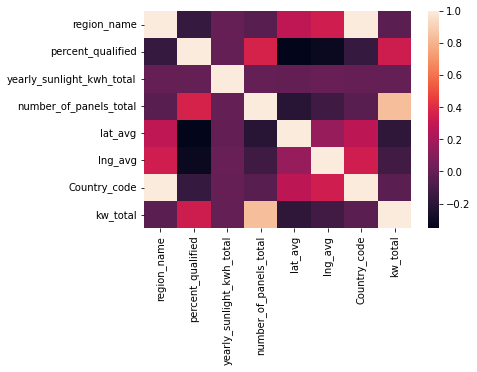

In [38]:
# Correlation Table

plt.figure.Figure(figsize=(100, 100))
# sns.heatmap(outlier_replaced[num_cols].corr());
sns.heatmap(data_pro[data_pro.columns].corr());

In [39]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# data_pro=sc.fit_transform(data_pro)

In [40]:
# data_pro=pd.DataFrame(data_pro)

In [41]:
data_pro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48664 entries, 0 to 48721
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   region_name                48664 non-null  int64  
 1   percent_qualified          48664 non-null  float64
 2   yearly_sunlight_kwh_total  48664 non-null  float64
 3   number_of_panels_total     48664 non-null  float64
 4   lat_avg                    48664 non-null  float64
 5   lng_avg                    48664 non-null  float64
 6   Country_code               48664 non-null  int64  
 7   kw_total                   48664 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 3.3 MB


In [42]:
X = data_pro.iloc[:,:-1]
X

,region_name,percent_qualified,yearly_sunlight_kwh_total,number_of_panels_total,lat_avg,lng_avg,Country_code
0,6037104401,86.303387,30.17,20876.0,34.267040,-118.432716,4
1,36055009400,85.813953,18.25,113565.0,43.156368,-77.607040,32
2,17201000700,56.446991,22.04,29409.0,42.277794,-89.066589,13
3,42003180300,38.297872,26.32,14393.0,40.422962,-79.993729,38
4,6059086602,90.382514,39.52,60394.0,33.844044,-117.933113,4
...,...,...,...,...,...,...,...
48717,48121020113,84.426947,10.42,64522.0,33.176277,-96.911400,43
48718,34027042302,45.887850,28.38,74373.0,40.838047,-74.476219,30
48719,6037543322,96.548550,14.21,86153.0,33.852547,-118.256958,4
48720,45079010309,83.550045,39.63,104058.0,34.113491,-81.140663,40


In [43]:
Y = data_pro.iloc[:,-1]
Y

0         5219.00
1        28391.25
2         7352.25
3         3598.25
4        15098.50
           ...   
48717    16130.50
48718    18593.25
48719    21538.25
48720    26014.50
48721       25.50
Name: kw_total, Length: 48664, dtype: float64

In [44]:
X = data_pro.iloc[:,:-1]
Y = data.iloc[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [45]:
Y

0         5219.00
1        28391.25
2         7352.25
3         3598.25
4        15098.50
           ...   
48717    16130.50
48718    18593.25
48719    21538.25
48720    26014.50
48721       25.50
Name: kw_total, Length: 48664, dtype: float64

In [46]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -78757991.073245 (19449370.324785)
ScaledLASSO: -78756492.425300 (19449801.156115)
ScaledEN: -99716327.693831 (18423990.938618)
ScaledKNN: -93767080.065641 (17500635.855306)
ScaledCART: -21380226.081628 (5845426.887446)
ScaledGBM: -10359203.994213 (6130622.202170)


In [47]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,75,80,90,100,150,200,300,400]))
model = GradientBoostingRegressor(random_state=21)
kfold = KFold(n_splits=10, random_state=21,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

-10414901.058386 (6364357.301271) with: {'n_estimators': 50}
-10251915.990578 (6181220.031646) with: {'n_estimators': 75}
-10265856.136173 (6178842.544597) with: {'n_estimators': 80}
-10305741.994987 (6137629.338402) with: {'n_estimators': 90}
-10331069.654443 (6147526.788346) with: {'n_estimators': 100}
-10489136.658987 (6162264.481207) with: {'n_estimators': 150}
-10587655.871829 (6175169.571332) with: {'n_estimators': 200}
-11191506.367313 (6481626.450295) with: {'n_estimators': 300}
-11493527.841767 (6646601.168071) with: {'n_estimators': 400}
Best: -10251915.990578 using {'n_estimators': 75}


In [48]:
scaler = StandardScaler().fit(X_train)
rescaled_X_train = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=21, n_estimators=80)
model.fit(rescaled_X_train, Y_train)

# transform the validation dataset
rescaled_X_test = scaler.transform(X_test)
predictions = model.predict(rescaled_X_test)


In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [50]:
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model
n_scores = cross_val_score(model, rescaled_X_train, Y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('MSE\t:%.3f' % (mean_squared_error(Y_test, predictions)))
print('MAE\t:%.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
print('Model Score\t:%.3f' %  (model.score(rescaled_X_train, Y_train)))      

MSE	:12708596.803
MAE	:-285.344 (45.585)
Model Score	:0.970


In [51]:
compare = pd.DataFrame({'Prediction': predictions, 'Test Data' : Y_test})
compare.sort_index().head(10)

,Prediction,Test Data
2,7290.630823,7352.25
10,13904.945861,13543.50
12,16041.057742,15831.00
23,24462.832014,24783.25
25,14755.498370,14665.50
40,15703.266859,15759.50
44,13279.903547,12434.25
45,19113.968057,18918.00
58,2947.982523,2913.25
69,19154.575505,19143.25


In [52]:
#save Model File
pickle.dump(model, open("Regression_model_for_Power_Generation.pkl", "wb"))

In [53]:
#Load Model for predictio
loaded_model = pickle.load(open("Regression_model_for_Power_Generation.pkl", "rb"))

In [54]:
X_test.sort_index()

,region_name,percent_qualified,yearly_sunlight_kwh_total,number_of_panels_total,lat_avg,lng_avg,Country_code
2,17201000700,56.446991,22.04,29409.0,42.277794,-89.066589,13
10,28049002100,56.684492,12.75,54174.0,32.315193,-90.224022,24
12,48201451403,95.863309,27.82,63324.0,29.745672,-95.621521,43
23,27055020100,78.819158,16.24,99133.0,43.820091,-91.297836,23
25,33017081100,51.560284,20.30,58662.0,43.161507,-70.876389,29
...,...,...,...,...,...,...,...
48694,39049007951,98.742138,36.01,126687.0,40.054760,-83.112473,35
48700,36059519300,80.597015,39.40,196072.0,40.765751,-73.513748,32
48704,1097000903,81.203008,36.10,25570.0,30.677395,-88.073486,0
48709,48167725200,83.628922,27.56,25338.0,29.290489,-94.821640,43


In [55]:
X_test.sort_index().iloc[[2]]

,region_name,percent_qualified,yearly_sunlight_kwh_total,number_of_panels_total,lat_avg,lng_avg,Country_code
12,48201451403,95.863309,27.82,63324.0,29.745672,-95.621521,43


In [56]:
# Rescale test inputs
scaler = StandardScaler().fit(X_train)
rescaled_X_test_one = scaler.transform(X_test.sort_index().iloc[[2]])

In [57]:
Y_test[12]

15831.0

In [58]:
#Predict Test inputs
Y_pred=loaded_model.predict(rescaled_X_test_one)

In [59]:
#Output Results - Power Generation for the year per particular location
Y_pred

array([16041.05774198])